In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File with median incomes and location, from 2005 - 2019

df = pd.read_excel(r"C:\Users\sandr\OneDrive\Desktop\Metis\DS_Engineering\1_Exploratory Data Analysis\nyc_median_incomes.xlsx")

# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        6068 non-null   object 
 1   Household Type  6068 non-null   object 
 2   TimeFrame       6068 non-null   int64  
 3   DataFormat      6068 non-null   object 
 4   Data            6064 non-null   float64
 5   Fips            6068 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 284.6+ KB


In [3]:
# Take a look at the first few rows
df.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Astoria,Families without Children,2019,Dollars,92755.00000,401
1,Astoria,Families with Children,2019,Dollars,75972.00000,401
2,Astoria,Families,2019,Dollars,88662.00000,401
3,Astoria,All Households,2019,Dollars,79180.00000,401
4,Astoria,Families without Children,2018,Dollars,79374.50784,401


In [4]:
# Look at column names
df.columns

Index(['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data',
       'Fips'],
      dtype='object')

In [5]:
# How many rows and columsn does the dataset have?
df.shape

(6068, 6)

In [6]:
# Identify which columns have null values

null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Data    4
dtype: int64

In [7]:
# Identify the rows with null values

df_null = df[df.isnull().any(axis=1)]
df_null

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
102,Battery Park/Tribeca,Families with Children,2015,Dollars,NaN,101
1697,Greenwich Village,Families with Children,2015,Dollars,NaN,102
2357,Murray Hill/Stuyvesant,Families with Children,2015,Dollars,NaN,106
3573,Upper East Side,Families with Children,2011,Dollars,NaN,108


In [8]:
# Remove rows with null values

df = df.dropna()

# verify no null values
df.isnull().sum() 

Location          0
Household Type    0
TimeFrame         0
DataFormat        0
Data              0
Fips              0
dtype: int64

In [9]:
# Find the range of the TimeFrame
year = df.TimeFrame
min_year = year.min()
max_year = year.max()
print(f"The time frame for this dataset ranges from {min_year} to {max_year}")

The time frame for this dataset ranges from 2005 to 2019


In [10]:
# Use only relevant columns for data
df = df[['Location', 'Data']]
df

,Location,Data
0,Astoria,92755.00000
1,Astoria,75972.00000
2,Astoria,88662.00000
3,Astoria,79180.00000
4,Astoria,79374.50784
...,...,...
6063,Zip Code 10474,22568.09834
6064,Zip Code 10454,22466.93352
6065,Zip Code 10454,21532.17550
6066,Zip Code 10454,21447.00000


In [11]:
# How many duplicates?
df.duplicated().sum()

24

In [12]:
# Find duplicate rows

duplicate_df = df[df.duplicated()]
duplicate_df

,Location,Data
119,Battery Park/Tribeca,254530.49350
1681,Greenwich Village,254530.49350
1999,Lower East Side,49277.06536
3902,Zip Code 10282,260735.11500
3904,Zip Code 10007,260735.11500
3912,Zip Code 10282,260735.11500
3913,Zip Code 10007,260735.11500
3914,Zip Code 10282,260735.11500
3920,Zip Code 10282,254530.49350
3924,Zip Code 10007,254530.49350


In [13]:
# Drop duplicate rows

df.drop_duplicates(inplace=True)
df

,Location,Data
0,Astoria,92755.00000
1,Astoria,75972.00000
2,Astoria,88662.00000
3,Astoria,79180.00000
4,Astoria,79374.50784
...,...,...
6063,Zip Code 10474,22568.09834
6064,Zip Code 10454,22466.93352
6065,Zip Code 10454,21532.17550
6066,Zip Code 10454,21447.00000


In [ ]:
# Why are the duplicate rows not dropped??
<<<<<<<<<<<<<< HELP >>>>>>>>>>>>

In [115]:
# List median income in descending order

df_highest = df.groupby('Location').median('Data').reset_index().sort_values(by='Data', ascending=False)
df_highest

,Location,Data
108,Zip Code 10282,254530.493500
71,Zip Code 10007,253796.363100
83,Zip Code 10022,250001.000000
82,Zip Code 10021,238294.371900
84,Zip Code 10023,219065.402350
...,...,...
37,Morrisania,28254.817605
30,Hunts Point,27314.425520
38,Mott Haven,27314.425520
144,Zip Code 10474,26481.378890


In [12]:
# Remove the "zip code"

def get_zip(location):
    zip_code = []
    if location[:8] == 'Zip Code':
        zip_code.append(location[9:])
    return zip_code
        
    
result = df['Location'].apply(get_zip)
result


0            []
1            []
2            []
3            []
4            []
         ...   
6063    [10474]
6064    [10454]
6065    [10454]
6066    [10454]
6067    [10474]
Name: Location, Length: 6064, dtype: object

In [149]:
# Find the median income for each location

df_lowest = df.groupby('Location').median('Data').reset_index().sort_values(by='Data')
df_lowest.head(10)


,Location,Data
124,Zip Code 10454,24830.706310
144,Zip Code 10474,26481.378890
38,Mott Haven,27314.425520
30,Hunts Point,27314.425520
37,Morrisania,28254.817605
22,East Tremont,28254.817605
130,Zip Code 10460,28861.702215
123,Zip Code 10453,29538.307480
125,Zip Code 10455,30359.976455
58,University Heights,30930.520920


###  5 Lowest Median Income Locations in NYC

### Are located in the Bronx

In [157]:
# Only view the 5 lowest median income areas by Zip Codes

low_5 = df.loc[df['Location'].isin(["Zip Code 10454", "Zip Code 10455", "Zip Code 10460", "Zip Code 10453", "Zip Code 10474"])]
low_5_median = low_5.groupby('Location').median().reset_index().sort_values(by='Data')
low_5_median

,Location,Data
1,Zip Code 10454,24830.706310
4,Zip Code 10474,26481.378890
3,Zip Code 10460,28861.702215
0,Zip Code 10453,29538.307480
2,Zip Code 10455,30359.976455


In [153]:
# Find the mean
low_5_mean = low_5.groupby('Location').mean().reset_index().sort_values(by='Data')
low_5_mean

,Location,Data
1,Zip Code 10454,26942.172107
4,Zip Code 10474,29759.099173
0,Zip Code 10453,30715.577323
3,Zip Code 10460,30881.594946
2,Zip Code 10455,31517.100767


## Visualizations

<BarContainer object of 5 artists>

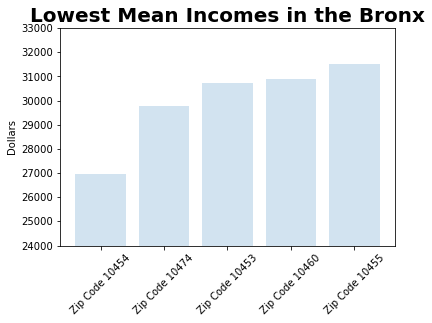

In [154]:
# Plot mean incomes

plt.xticks(rotation=45)
plt.ylabel("Dollars")
plt.title("Lowest Mean Incomes in the Bronx", size=20, fontweight="bold")

plt.ylim(24000,33000)

values = low_5_mean['Data']
names = low_5_mean['Location']

plt.bar(names, values, alpha=0.2)

<BarContainer object of 5 artists>

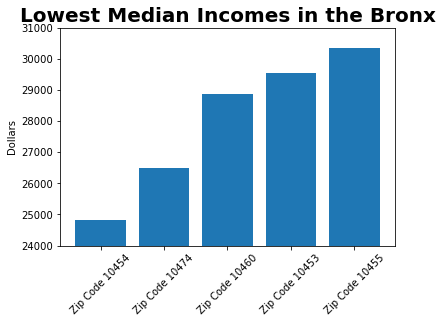

In [158]:
# Plot median incomes

plt.xticks(rotation=45)
plt.ylabel("Dollars")
plt.title("Lowest Median Incomes in the Bronx", size=20, fontweight="bold")

plt.ylim(24000,31000)

values = low_5_median['Data']
names = low_5_median['Location']

plt.bar(names, values)


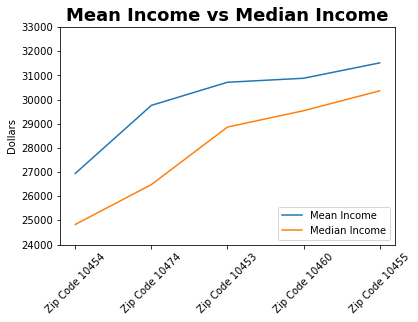

In [159]:
# Plot the mean incomes against the median incomes

mean = low_5_mean['Data']
median = low_5_median['Data']
zips = low_5_mean['Location']

plt.ylim(24000,33000)

plt.plot(zips, mean)
plt.plot(zips, median)

plt.title('Mean Income vs Median Income', fontweight='bold', size=18)
plt.xticks(rotation=45)
plt.ylabel("Dollars")

plt.legend(['Mean Income', 'Median Income'], loc='lower right')


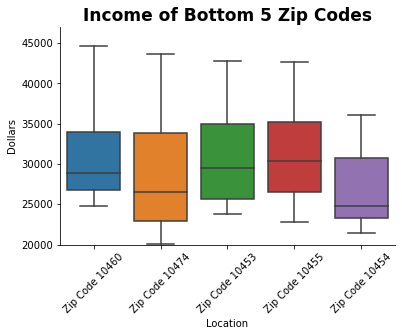

In [161]:
# Plot a boxplot of lowest 5 income areas

values = low_5['Data']
names = low_5['Location']

plt.ylim(20000,47000)

sns.boxplot(x=names,y=values)

plt.xticks(rotation=45)
plt.ylabel("Dollars")

plt.title('Income of Bottom 5 Zip Codes', fontweight='bold', size=17)

sns.despine()